In [ ]:
! pip install darts

In [2]:
import darts
import pandas as pd

#  **Loading Dataset**

In [3]:
from darts.datasets import AirPassengersDataset

In [4]:
#  Visualizing the Data by converting to dataframe
AirPassengersDataset().load().pd_dataframe()

component,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [5]:
series_air = AirPassengersDataset().load()

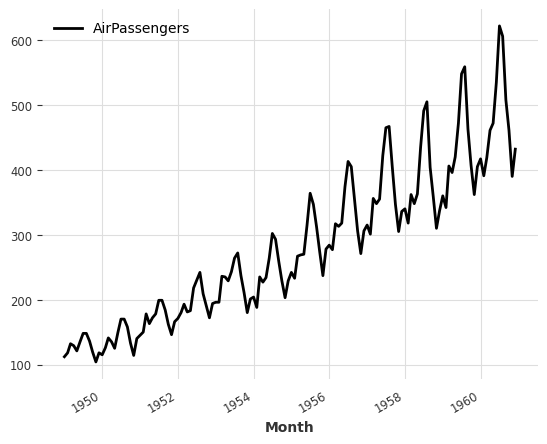

In [6]:
series_air.plot(label = 'AirPassengers')

# **Splitting the dataset for training and backtesting**

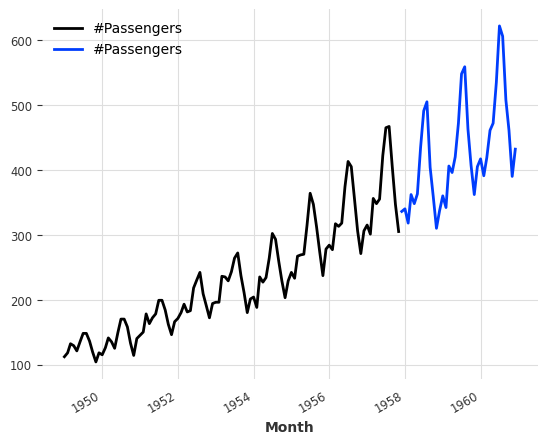

In [7]:
train, test = series_air.split_before(0.75)
train.plot()
test.plot()

Clearly we can sense that this time series is not stationary as the mean is not constant and we can detect an upward trend in the data .

In [8]:
from darts.models.forecasting.arima import ARIMA

In [9]:
from darts.utils.statistics import check_seasonality,plot_acf,plot_pacf,remove_seasonality,remove_trend,stationarity_test_adf
from darts.utils.statistics import extract_trend_and_seasonality

**Checks whether the TimeSeries ts is seasonal with period m or not.**

# **Checking for seasonality and Trend**

In [10]:
check_seasonality(train)

(True, 12)

In [11]:
noseasonal = remove_seasonality(train)

In [12]:
stationary_ts = remove_trend(noseasonal)

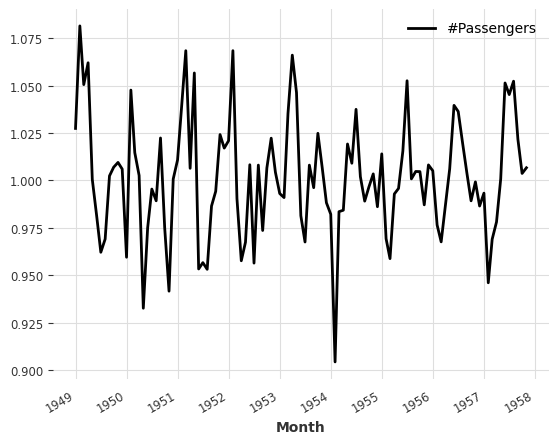

In [13]:
stationary_ts.plot()

In [14]:
from darts.utils.statistics import stationarity_test_adf

In [15]:
stationarity_test_adf(stationary_ts)

(-5.486168749285798,
 2.227467203283441e-06,
 7,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 -404.3927875978957)

In [16]:
def preprocess(s):
  print("Checking for seasonality")
  print(check_seasonality(s))

  print("Removing seasonality ")
  if check_seasonality(s)[0] == True:
    series1 = remove_seasonality(s)
  
  print("An upward trend is spotted so removing it")
  series2 = remove_trend(series1)

  return series2.plot()


Checking for seasonality

(True, 12)

Removing seasonality 

An upward trend is spotted so removing it


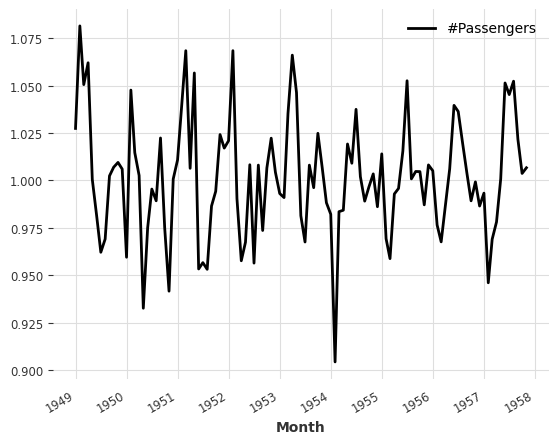

In [17]:
preprocess(train)

The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are important tools in time series analysis for understanding the properties of the data and determining the appropriate models to use for forecasting.

The ACF measures the correlation between a time series and its lagged values. It helps to identify the presence of any repeating patterns or cycles in the data. A strong positive correlation at a specific lag indicates that the data is highly correlated with its past values at that lag, while a strong negative correlation indicates that the data is negatively correlated with its past values at that lag. The ACF can help to determine the order of an Autoregressive (AR) model.

# **Plotting ACF and PACF**

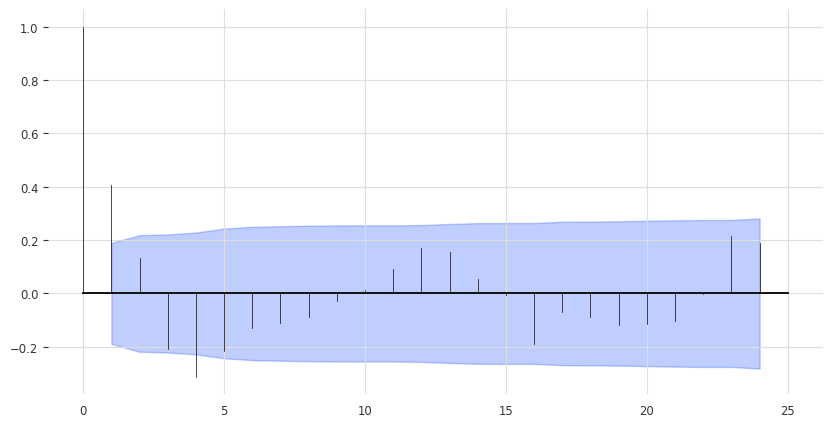

In [18]:
plot_acf(stationary_ts)

# Plots the ACF of ts, highlighting it at lag m, with corresponding significance interval. 

The PACF, on the other hand, measures the correlation between a time series and its lagged values after removing the effect of the intervening lags. It helps to identify the presence of any direct or immediate relationships between the data and its past values. A strong positive correlation at a specific lag indicates that the data is highly correlated with its past values at that lag after removing the effect of the intervening lags, while a strong negative correlation indicates that the data is negatively correlated with its past values at that lag after removing the effect of the intervening lags. The PACF can help to determine the order of a Moving Average (MA) model.

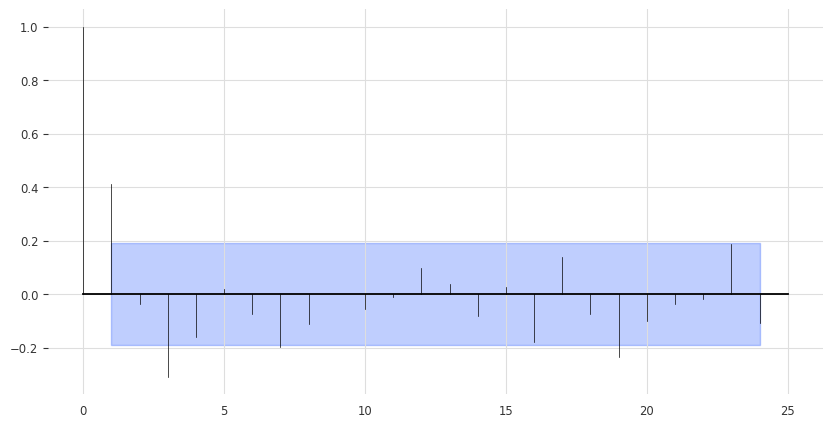

In [19]:
plot_pacf(stationary_ts)

# Plots the Partial ACF of ts, highlighting it at lag m, with corresponding significance interval.

# **Building Models**

# **AutoARIMA**

In [20]:
from darts.models.forecasting.auto_arima import AutoARIMA

In [21]:
model = AutoARIMA()

In [22]:
model.fit(train)

AutoARIMA(add_encoders=None)

In [23]:
pred = model.predict(n=36)

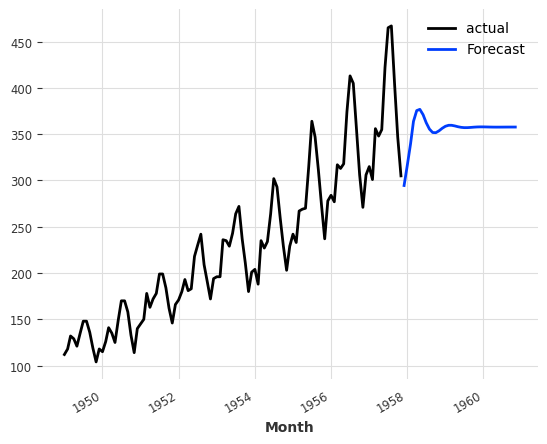

In [24]:
train.plot(label='actual ')
pred.plot(label='Forecast')
# print("MAPE = {:.2f}%".format(mape(train,pred)))

In [25]:
from darts.models import NBEATSModel

Neural Basis Expansion Analysis Time Series Forecasting (N-BEATS).

input_chunk_length (int) – The length of the input sequence fed to the model.

output_chunk_length (int) – The length of the forecast of the model.

N-BEATS is a fully convolutional neural network that is designed to model time series data in a way that is both accurate and interpretable. The model consists of a series of fully connected layers, each of which applies a non-linear transformation to the input time series data.

Another important feature of N-BEATS is its interpretability. The model can be visualized as a series of "trend" and "seasonality" components, which makes it easy to understand how the model is making its predictions

# **NBEATSModel**

In [26]:
model = NBEATSModel(input_chunk_length=24,output_chunk_length=12,n_epochs=100,
                    random_state = 0)

In [27]:
model.fit(train)

Training: 0it [00:00, ?it/s]

NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

In [28]:
pred = model.predict(n=36,series=train)

Predicting: 0it [00:00, ?it/s]

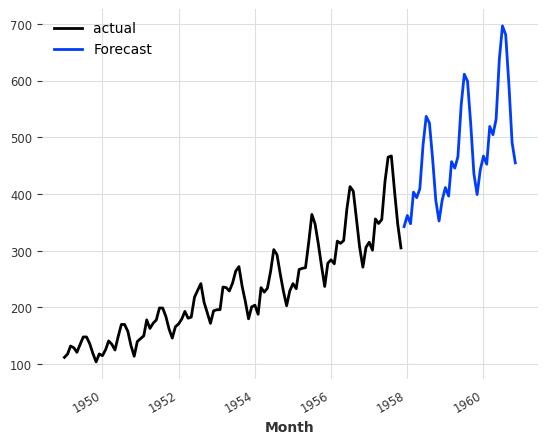

In [29]:
train.plot(label='actual ')
pred.plot(label='Forecast')
